# Step 1 : Upload Raw Data

In [1]:
import pandas as pd
Old_data = pd.read_csv(r"C:\Users\eryas\OneDrive\Desktop\adult 3.csv")

In [2]:
Old_data.head()

,age,workclass,fnlwgt,education,educational-num,marital_status,occupation,relationship,race,gender,capital-gain,capital-loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
Old_data.tail()

,age,workclass,fnlwgt,education,educational-num,marital_status,occupation,relationship,race,gender,capital-gain,capital-loss,hours_per_week,native_country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
Old_data.shape

(48842, 15)

# Step 2 : Feature Selection

In [5]:
data = Old_data.drop(columns = ['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss'])

In [6]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [7]:
#null value
data.isna()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
hours_per_week    0
native_country    0
income            0
dtype: int64

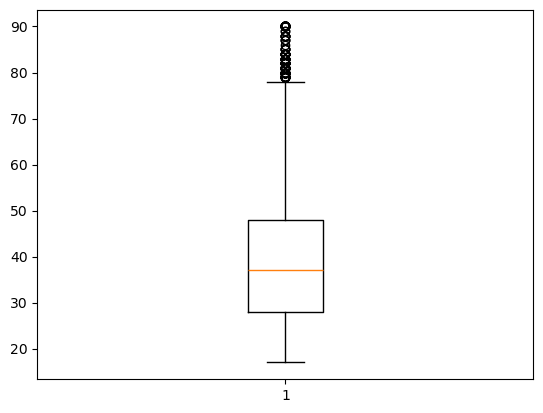

In [9]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

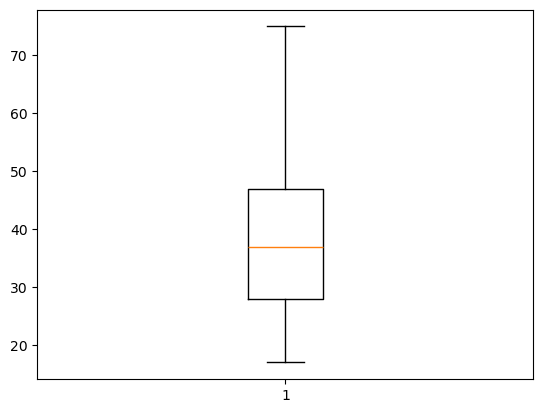

In [10]:
data = data[(data['age']<=75) & (data['age']>=17)]
plt.boxplot(data['age'])
plt.show()

In [11]:
print(data['workclass'].value_counts())

workclass
Private             33756
Self-emp-not-inc     3796
Local-gov            3110
?                    2700
State-gov            1979
Self-emp-inc         1669
Federal-gov          1428
Without-pay            21
Never-worked           10
Name: count, dtype: int64


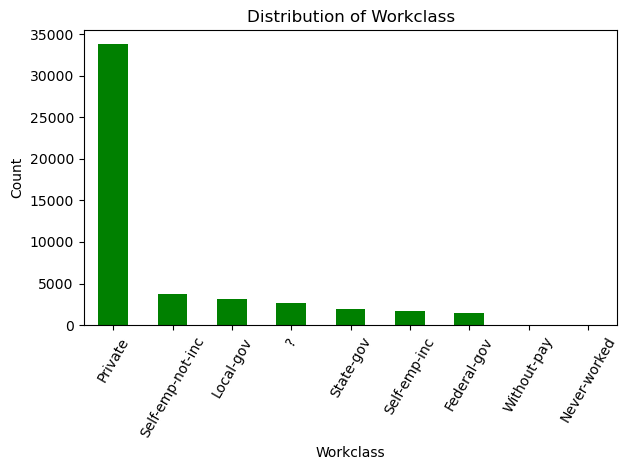

In [12]:
# Count the occurrences of each category in the 'workclass' column
workclass_counts = data['workclass'].value_counts()

# Plot the bar graph
workclass_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

In [13]:
data = data[data['workclass'] != '?']
data = data[data['workclass'] != 'without-pay']
data = data[data['workclass'] != 'Never-worked']

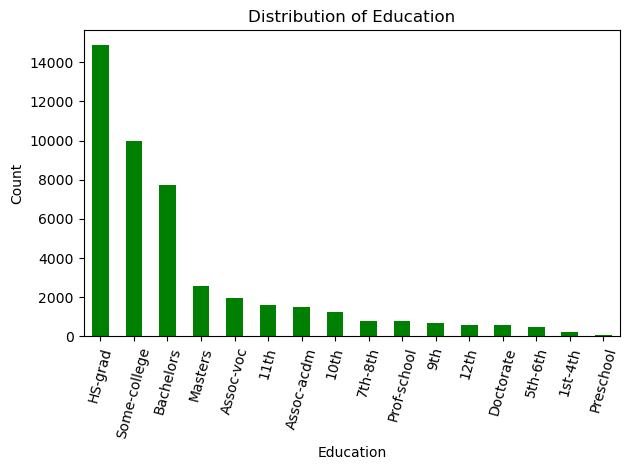

In [14]:
# Count the occurrences of each category in the 'education' column
education_counts = data['education'].value_counts()

# Plot the bar graph
education_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

In [15]:
data = data[data['education'] != '5th-6th']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != 'Preschool']

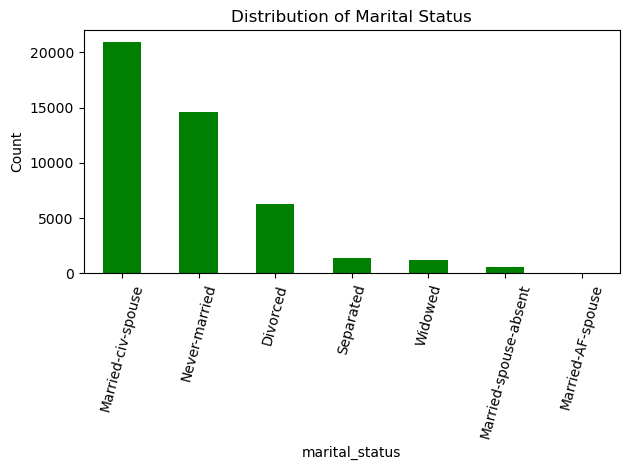

In [16]:
# Count the occurrences of each category in the 'marital_status' column
marital_status_counts = data['marital_status'].value_counts()

# Plot the bar graph
marital_status_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('marital_status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

In [17]:
data = data[data['marital_status'] != 'Married-AF-spouse']

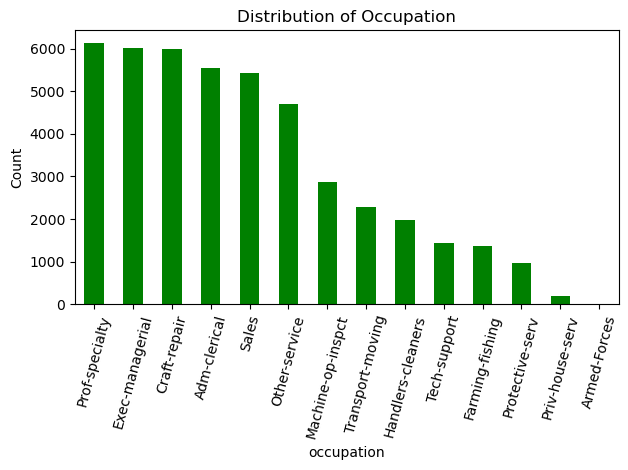

In [18]:
# Count the occurrences of each category in the 'occupation' column
occupation_counts = data['occupation'].value_counts()

# Plot the bar graph
occupation_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

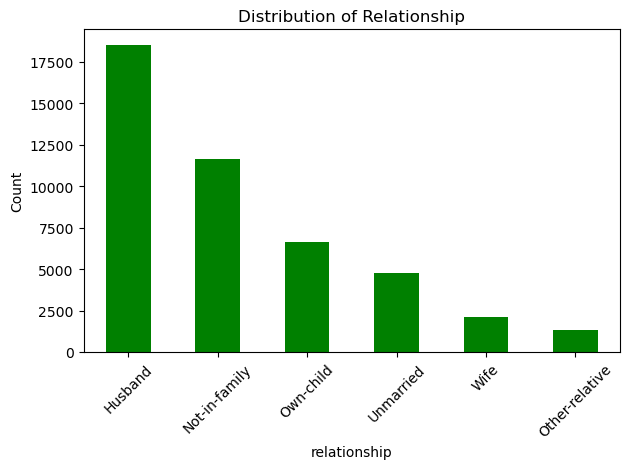

In [19]:
# Count the occurrences of each category in the 'relationship' column
relationship_counts = data['relationship'].value_counts()

# Plot the bar graph
relationship_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('relationship')
plt.ylabel('Count')
plt.title('Distribution of Relationship')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

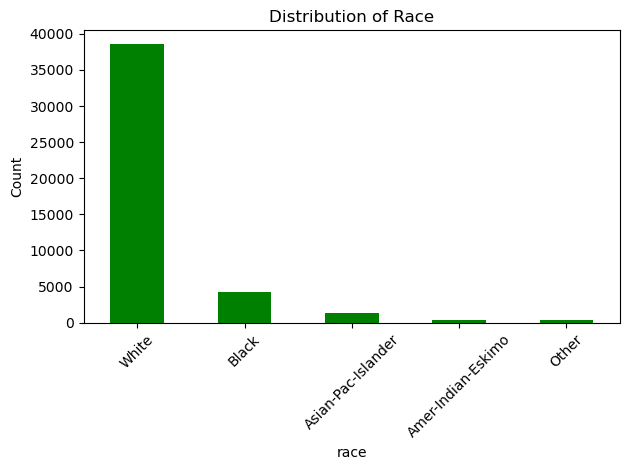

In [20]:
# Count the occurrences of each category in the 'race' column
relationship_counts = data['race'].value_counts()

# Plot the bar graph
relationship_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

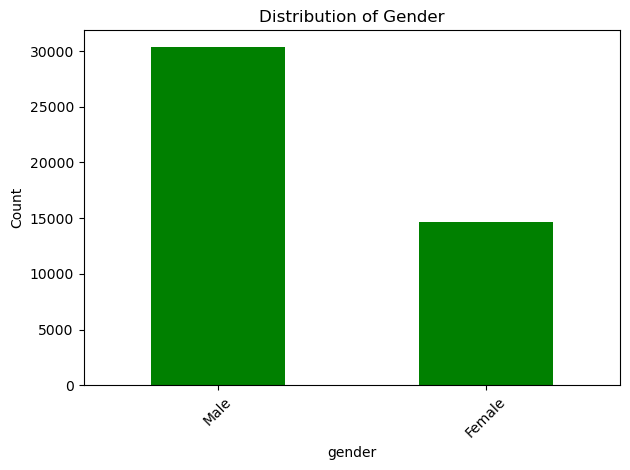

In [21]:
# Count the occurrences of each category in the 'gender' column
relationship_counts = data['gender'].value_counts()

# Plot the bar graph
relationship_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

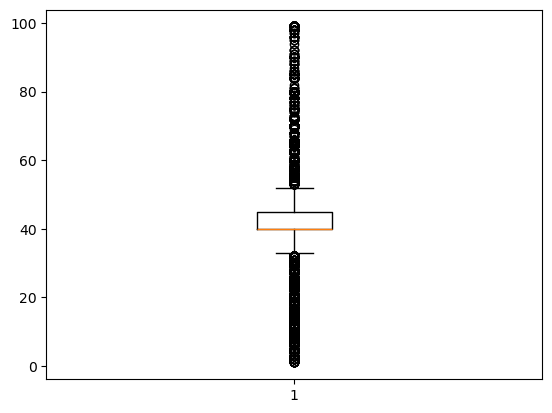

In [22]:
import matplotlib.pyplot as plt
plt.boxplot(data['hours_per_week'])
plt.show()

In [23]:
data = data[(data['hours_per_week']<=60) & (data['hours_per_week']>=20)]

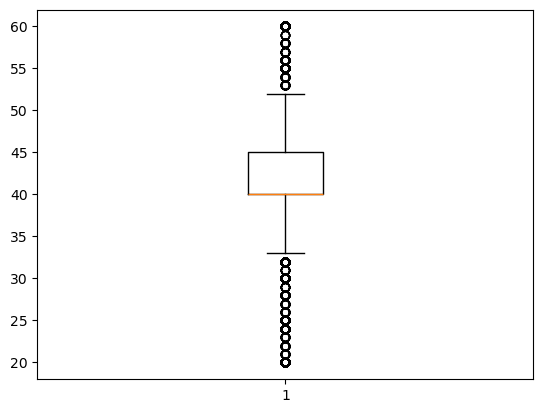

In [24]:
plt.boxplot(data['hours_per_week'])
plt.show()

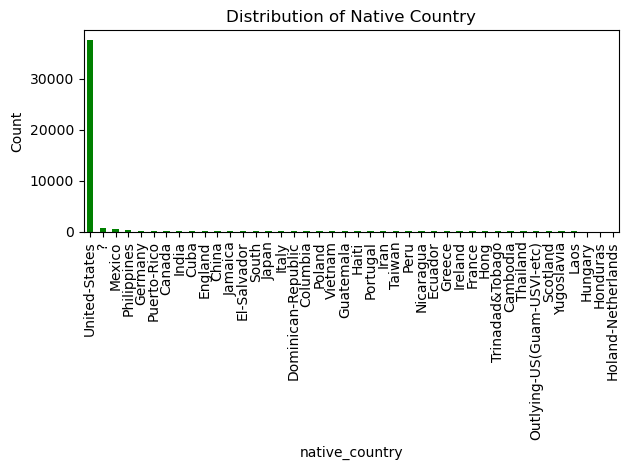

In [25]:
# Count the occurrences of each category in the 'native_country' column
native_country_counts = data['native_country'].value_counts()

# Plot the bar graph
native_country_counts.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('native_country')
plt.ylabel('Count')
plt.title('Distribution of Native Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent clipping

# Show the plot
plt.show()

In [26]:
data = data[data['native_country'] != '?']
data = data[data['native_country'] != 'Hungary']
data = data[data['native_country'] != 'Honduras']
data = data[data['native_country'] != 'Holand-Netherlands']

In [27]:
data.shape

(40710, 11)

In [28]:
x = data.drop(columns = 'income')
y = data['income']

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 23, stratify = y)

In [30]:
xtrain.shape

(32568, 10)

In [31]:
xtest.shape

(8142, 10)

In [32]:
ytrain.shape

(32568,)

In [33]:
ytest.shape

(8142,)

# Step 3 : Model testing & training

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ohe = ColumnTransformer(transformers=[
    ('OHE', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']),
],remainder='passthrough')

mms = ColumnTransformer([('SCALE', MinMaxScaler(), slice(0, 100))])

In [50]:
xtrain2 = mms.fit_transform(ohe.fit_transform(xtrain))

In [51]:
xtest2 = mms.fit_transform(ohe.transform(xtest))

In [57]:
# compare some models & will be selected based upon maximum accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


models = {
    "LogisticRgression" : LogisticRegression(),
    'MLPClassifier' : MLPClassifier(solver = 'adam', hidden_layer_sizes = (5,2), random_state = 2, max_iter = 2000),
    "svm" : SVC(),
    "KNN" : KNeighborsClassifier(),
    'DecisionTree' : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "GradientBoosting" : GradientBoostingClassifier()
}

results = {}

for name, model in models.items() :
    model.fit(xtrain2, ytrain)
    y_pred = model.predict(xtest2)
    acc = accuracy_score(ytest, y_pred)
    results[name] = acc
    print(f"{name} Accuracy : {acc:.4f}")

LogisticRgression Accuracy : 0.8298
MLPClassifier Accuracy : 0.8311
svm Accuracy : 0.8282
KNN Accuracy : 0.8138
DecisionTree Accuracy : 0.7803
RandomForest Accuracy : 0.8098
GradientBoosting Accuracy : 0.8308


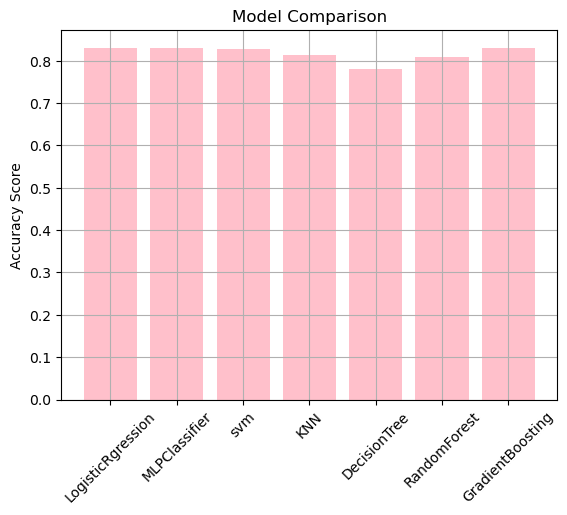

In [60]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color = "pink")
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [61]:
# Greadient Boosting is the best model as it has 83 % accuracy & works well on tabular data
gb = GradientBoostingClassifier()

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('One_Hot_Encoding', ohe),
    ('Min_Max_Scaler', mms),
    ('Gradient_Boosting_Classifier', gb)
])

In [62]:
# Taken a row from data for testing our model
import numpy as np
import pandas as pd
test_data = np.array([52, 'Self-emp-inc', 'HS-grad', 'Married-civ-spouse','Exec-managerial', 'Wife', 'White', 'Female', 40, 'United-States']
, dtype=object).reshape(1,10)

columns = ['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'hours_per_week', 'native_country']
test_data1 = pd.DataFrame(test_data, columns=columns)


In [63]:
pipe.fit(xtrain, ytrain)

C:\Users\eryas\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('One_Hot_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native_country'])])),
                ('Min_Max_Scaler',
                 ColumnTransformer(transformers=[('SCALE', MinMaxScaler(),
                                                  slice(0, 100, None))])),
                ('Gradient_Boosting_Classifier', GradientBoostingClassifier())])

In [64]:
# For visualise the pipeline in above diagram
from sklearn import set_config
set_config(display='diagram')

In [65]:
ypred = pipe.predict(xtest)

In [66]:
accuracy_score(ytest, ypred)

0.8307541144681896

In [67]:
pipe.predict(test_data1)

array(['>50K'], dtype=object)

In [315]:
import pickle 
pickle.dump(pipe, open('pipe.pkl', 'wb'))